In [ ]:
#Team IBM
#Kavin kumar M
#Keerthivasan R
#Harshini N
#Gayathiri K

In [1]:
pip install flask

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import pickle

In [10]:
train_data = pd.read_csv('autos.csv')
train_data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [11]:
train_data['kilometer'].value_counts()

150000    240797
125000     38067
100000     15920
90000      12523
80000      11053
70000       9773
60000       8669
50000       7615
5000        7069
40000       6376
30000       6041
20000       5676
10000       1949
Name: kilometer, dtype: int64

In [14]:
def benzz(x):
    if x=='mercedes_benz':
        return 'benz'
    else:
        return x
train_data['kilometer'] = train_data['kilometer'].apply(benzz)

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [ ]:
train_data['dateCreated'] = pd.to_datetime(train_data['lastSeen'],format='%y/%m/%d').dt.day
#train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.month
#train_data.drop('Date_of_Journey',inplace=True,axis=1)
train_data.head()

In [18]:
train_data['yearOfRegistration'].value_counts()

2000    24551
1999    22767
2005    22316
2006    20230
2001    20218
        ...  
4100        1
3500        1
1200        1
5300        1
2290        1
Name: yearOfRegistration, Length: 155, dtype: int64

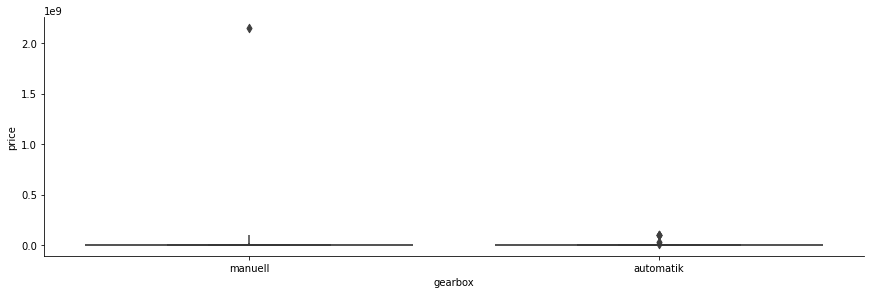

In [22]:
sns.catplot(x='gearbox',y='price',data=train_data.sort_values('price',ascending=False),kind='boxen',aspect=3,height=4)

In [33]:
brand = train_data[['brand']]
brand = pd.get_dummies(brand,drop_first=True)

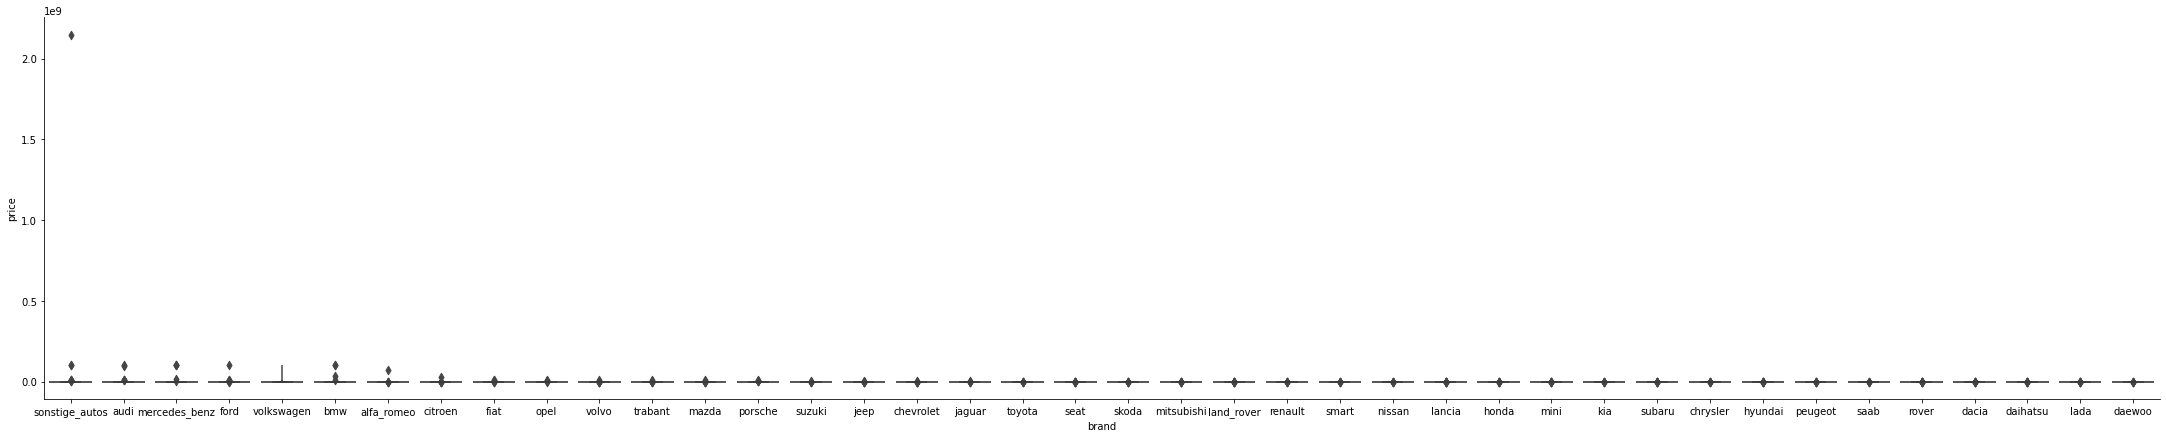

In [20]:
sns.catplot(x='brand',y='price',data=train_data.sort_values('price',ascending=False),kind='boxen',aspect=5,height=6)

In [23]:
gearbox = train_data[['gearbox']]
gearbox = pd.get_dummies(gearbox,drop_first=True)
gearbox.head()

,gearbox_manuell
0,1
1,1
2,0
3,1
4,1


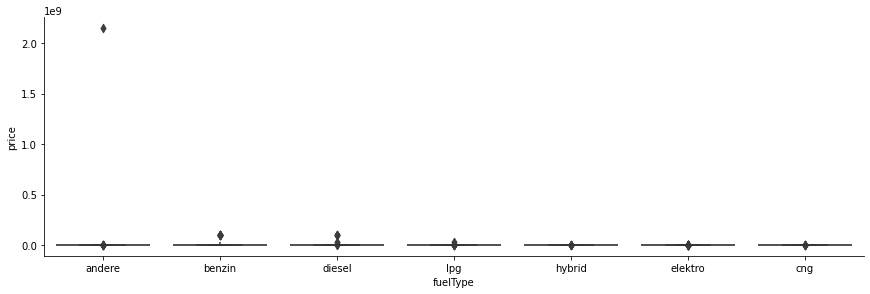

In [25]:
sns.catplot(x='fuelType',y='price',data=train_data.sort_values('price',ascending=False),kind='boxen',aspect=3,height=4)

In [26]:
fuelType = train_data[['fuelType']]
fuelType = pd.get_dummies(fuelType,drop_first=True)
fuelType.head()

,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg
0,1,0,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,0,0,1,0,0,0


In [34]:
print(brand.shape)
print(gearbox.shape)
print(fuelType.shape)
print(train_data.shape)

(371528, 39)
(371528, 1)
(371528, 6)
(371528, 20)


In [35]:
data_train = pd.concat([train_data,brand,gearbox,fuelType],axis=1)
data_train.drop(['brand','gearbox','fuelType'],axis=1,inplace=True)
data_train.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,powerPS,model,...,brand_trabant,brand_volkswagen,brand_volvo,gearbox_manuell,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,0,golf,...,0,1,0,1,1,0,0,0,0,0
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,190,NaN,...,0,0,0,1,0,0,1,0,0,0
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,163,grand,...,0,0,0,0,0,0,1,0,0,0
3,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,75,golf,...,0,1,0,1,1,0,0,0,0,0
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,69,fabia,...,0,0,0,1,0,0,1,0,0,0


In [36]:
X = data_train.drop('price',axis=1)
X.head()

,dateCrawled,name,seller,offerType,abtest,vehicleType,yearOfRegistration,powerPS,model,kilometer,...,brand_trabant,brand_volkswagen,brand_volvo,gearbox_manuell,fuelType_benzin,fuelType_cng,fuelType_diesel,fuelType_elektro,fuelType_hybrid,fuelType_lpg
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,test,NaN,1993,0,golf,150000,...,0,1,0,1,1,0,0,0,0,0
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,test,coupe,2011,190,NaN,125000,...,0,0,0,1,0,0,1,0,0,0
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,test,suv,2004,163,grand,125000,...,0,0,0,0,0,0,1,0,0,0
3,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,test,kleinwagen,2001,75,golf,150000,...,0,1,0,1,1,0,0,0,0,0
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,test,kleinwagen,2008,69,fabia,90000,...,0,0,0,1,0,0,1,0,0,0


In [37]:
y = data_train['price']
y.head()

0      480
1    18300
2     9800
3     1500
4     3600
Name: price, dtype: int64

<AxesSubplot:>

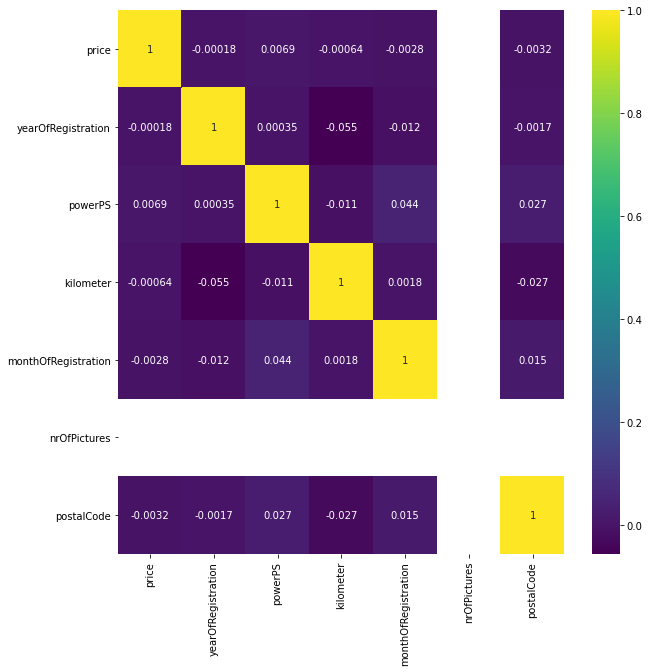

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(train_data.corr(),cmap='viridis',annot=True)

In [ ]:
reg = ExtraTreesRegressor()
reg.fit(X,y)

print(reg.feature_importances_)

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


# Random search of parameters, using 5 fold cross validation, search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = random_grid,
                               scoring='neg_mean_squared_error', n_iter = 10, cv = 5, 
                               verbose=1, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

In [ ]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

In [ ]:
print('r2 score: ', metrics.r2_score(y_test,y_pred))

In [ ]:
file = open('flight_rf.pkl', 'wb')
pickle.dump(rf_random, file)